In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
import pickle
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('/content/customers (1).csv')
df.columns
df.dtypes
df.shape
df.isnull().sum()
df_cleaned=df.dropna(axis=0)
df_cleaned.shape
df_cleaned.nunique()
df_cleaned=df_cleaned.drop(columns=['ID','Var_1'],axis=1)

In [3]:
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
ordinal_encoder = OrdinalEncoder()
df_cleaned[columns_to_encode] = ordinal_encoder.fit_transform(df_cleaned[columns_to_encode])
df_cleaned.head()
df_cleaned.dtypes

,0
Gender,float64
Ever_Married,float64
Age,int64
Graduated,float64
Profession,float64
Work_Experience,float64
Spending_Score,float64
Family_Size,float64
Segmentation,object


In [5]:
df_cleaned

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,22,0.0,5.0,1.0,2.0,4.0,D
2,0.0,1.0,67,1.0,2.0,1.0,2.0,1.0,B
3,1.0,1.0,67,1.0,7.0,0.0,1.0,2.0,B
5,1.0,1.0,56,0.0,0.0,0.0,0.0,2.0,C
6,1.0,0.0,32,1.0,5.0,1.0,2.0,3.0,C
...,...,...,...,...,...,...,...,...,...
10689,0.0,0.0,35,1.0,3.0,1.0,2.0,2.0,D
10690,1.0,0.0,29,0.0,5.0,9.0,2.0,4.0,B
10691,0.0,0.0,35,1.0,1.0,1.0,2.0,1.0,A
10693,1.0,1.0,47,1.0,4.0,1.0,1.0,5.0,C


In [6]:
le = LabelEncoder()
df_cleaned['Segmentation'] = le.fit_transform(df_cleaned['Segmentation'])
df_cleaned

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,22,0.0,5.0,1.0,2.0,4.0,3
2,0.0,1.0,67,1.0,2.0,1.0,2.0,1.0,1
3,1.0,1.0,67,1.0,7.0,0.0,1.0,2.0,1
5,1.0,1.0,56,0.0,0.0,0.0,0.0,2.0,2
6,1.0,0.0,32,1.0,5.0,1.0,2.0,3.0,2
...,...,...,...,...,...,...,...,...,...
10689,0.0,0.0,35,1.0,3.0,1.0,2.0,2.0,3
10690,1.0,0.0,29,0.0,5.0,9.0,2.0,4.0,1
10691,0.0,0.0,35,1.0,1.0,1.0,2.0,1.0,0
10693,1.0,1.0,47,1.0,4.0,1.0,1.0,5.0,2


<ipython-input-17-180ee21f7e62>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Age'])


<Axes: xlabel='Family_Size', ylabel='Age'>

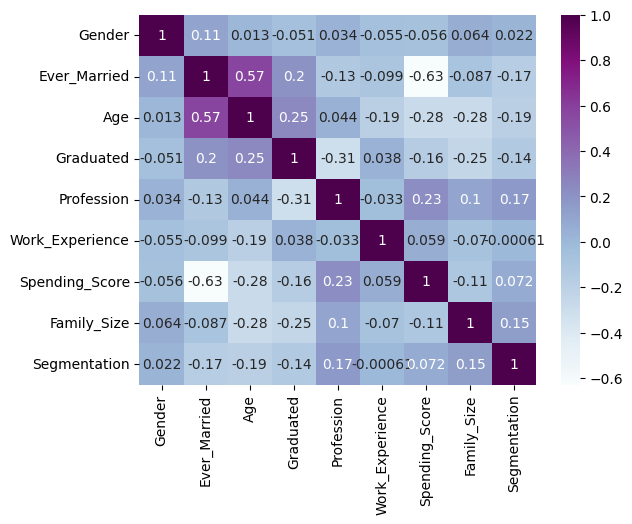

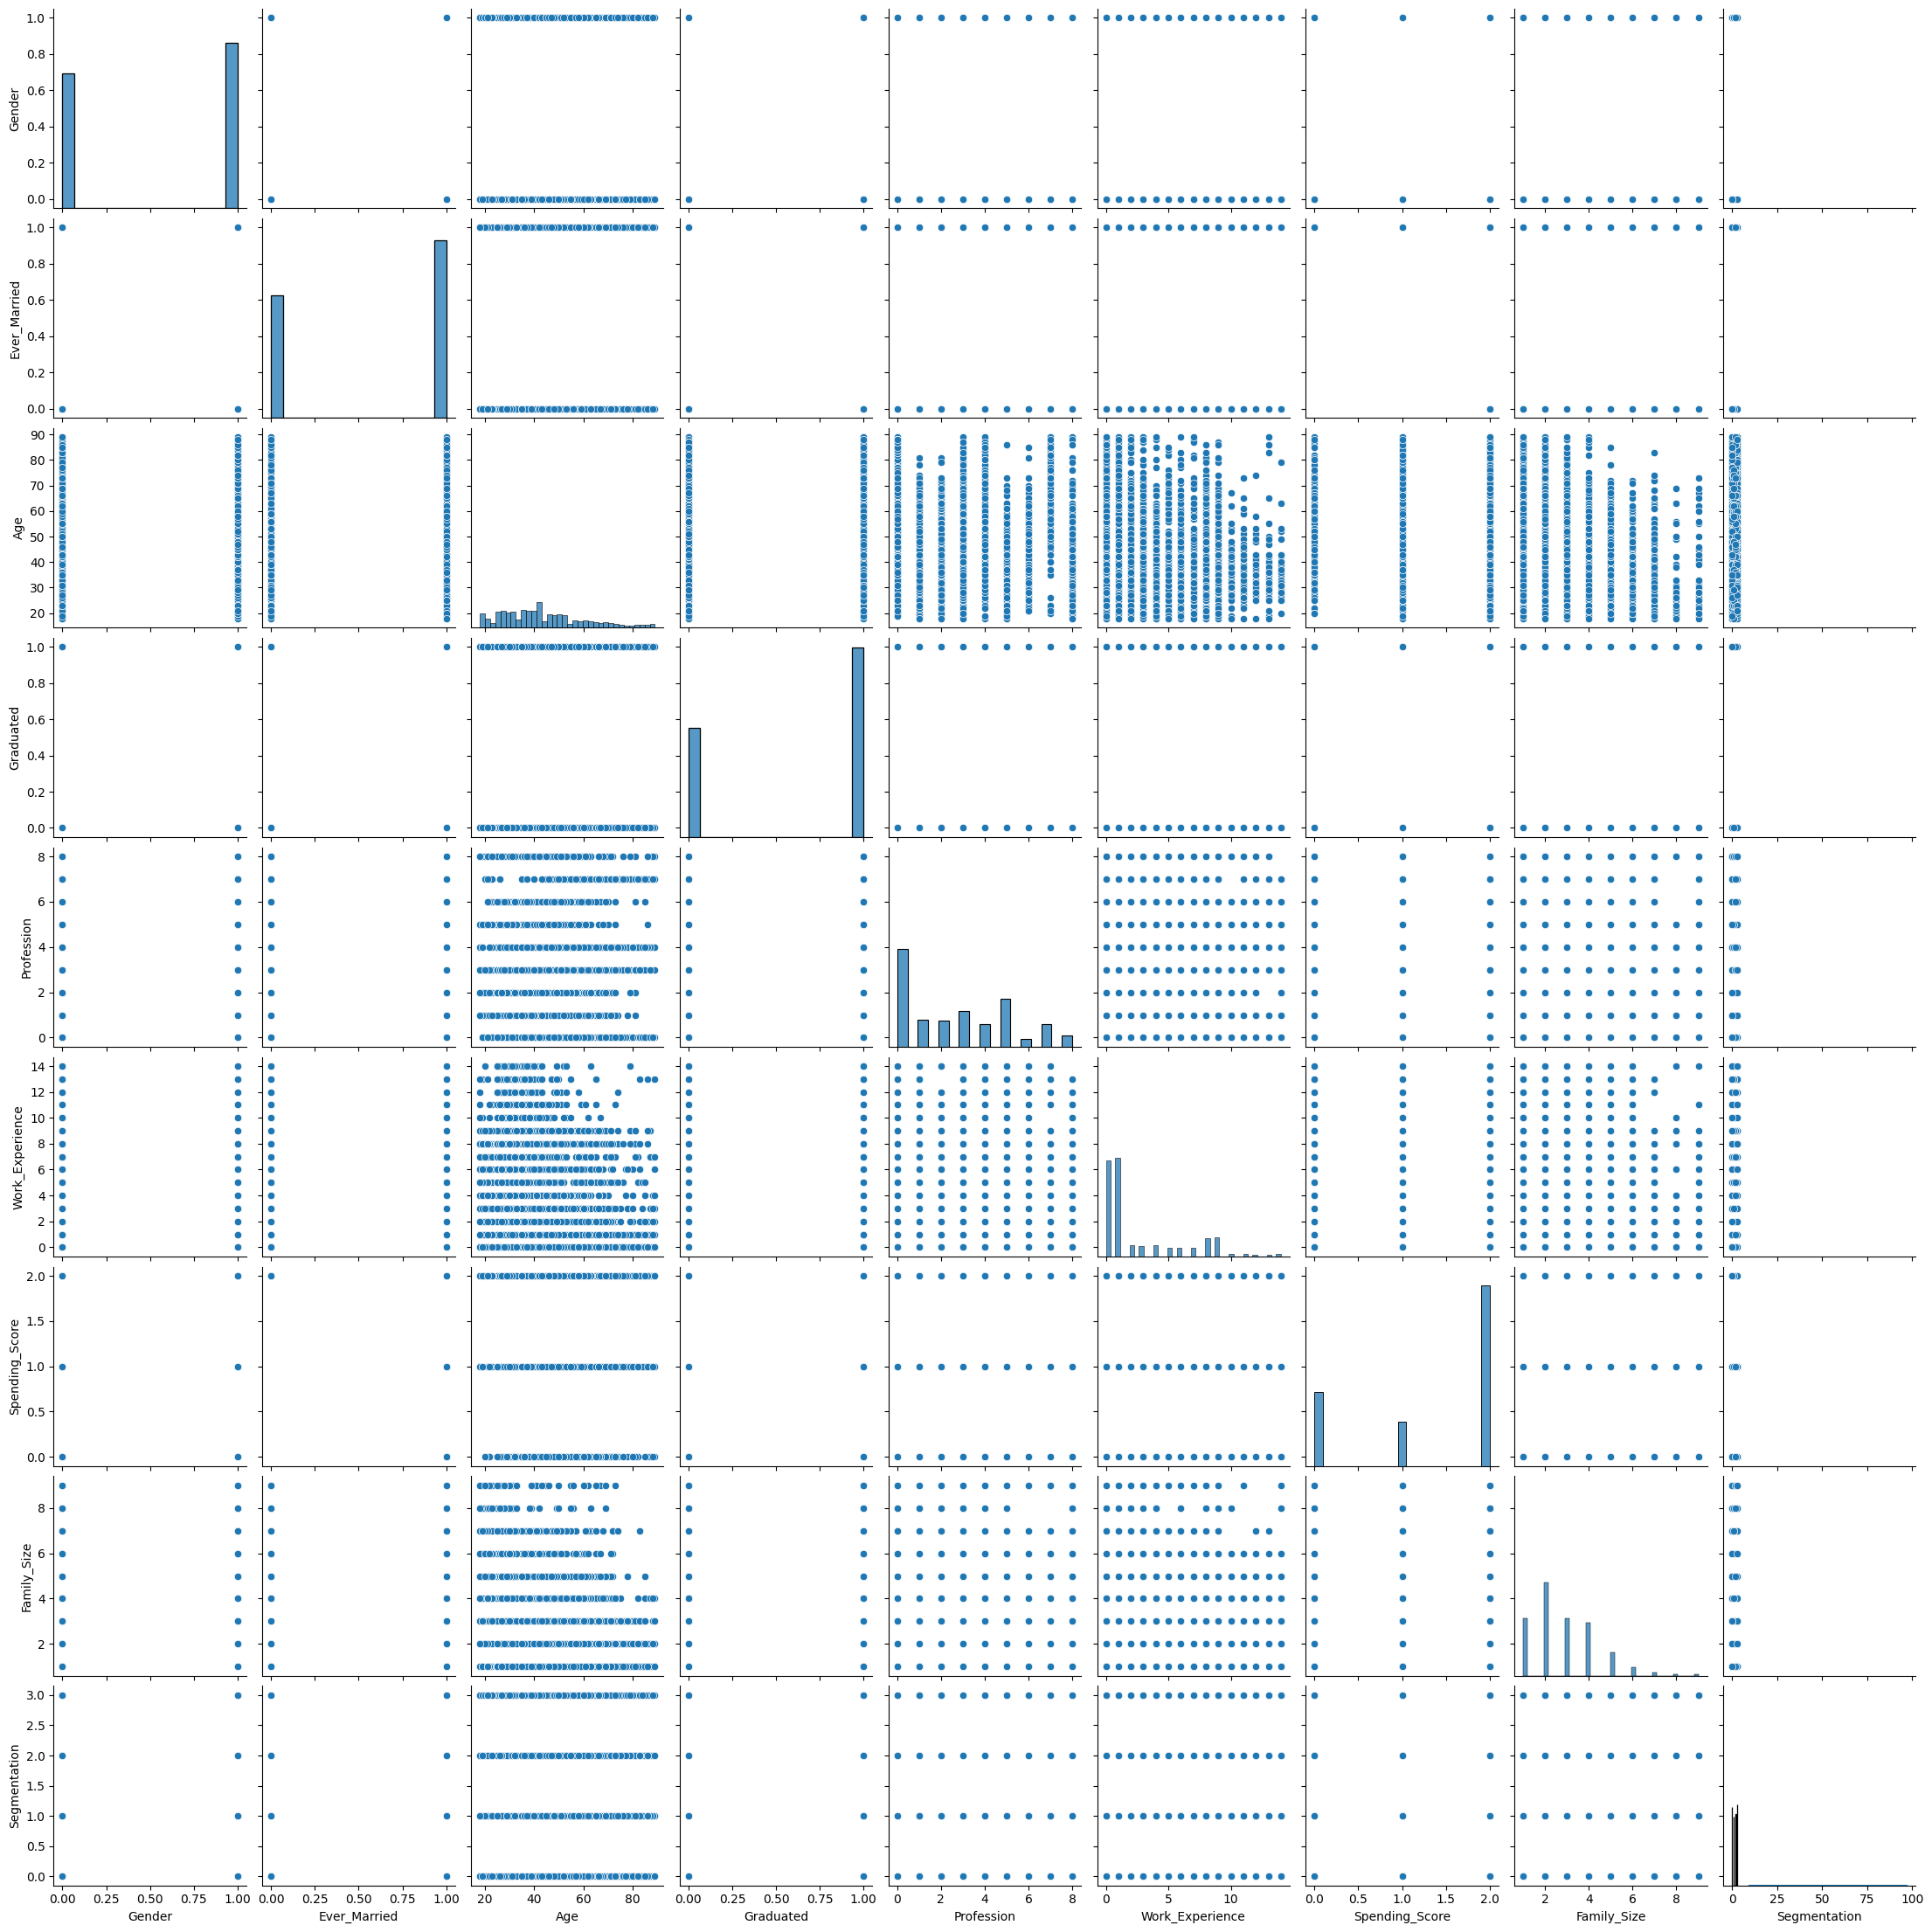

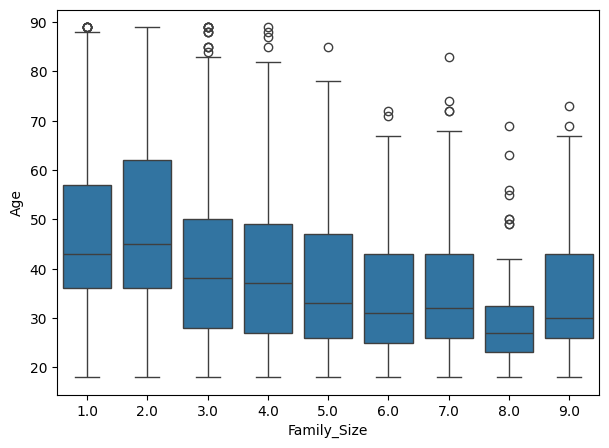

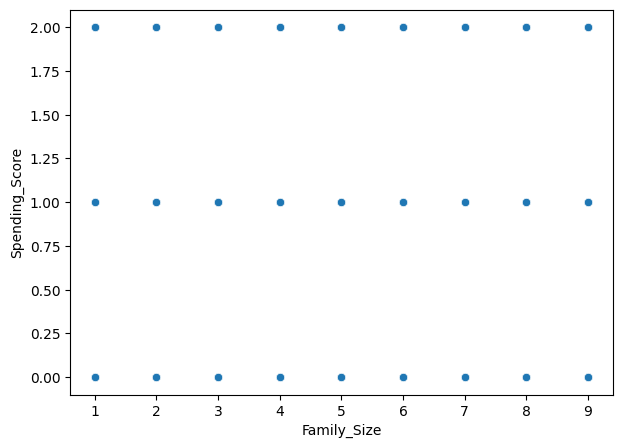

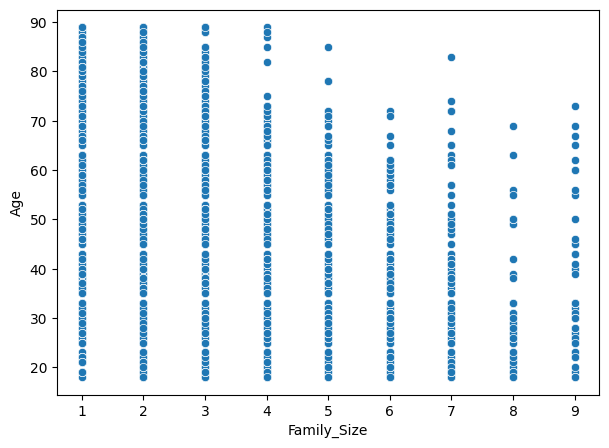

In [17]:
corr = df_cleaned.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap="BuPu",annot= True)
sns.pairplot(df_cleaned)
sns.distplot(df_cleaned['Age'])
plt.figure(figsize=(7,5))
sns.boxplot(x='Family_Size',y='Age',data=df_cleaned)
plt.figure(figsize=(7,5))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=df_cleaned)
plt.figure(figsize=(7,5))
sns.scatterplot(x='Family_Size',y='Age',data=df_cleaned)

In [7]:
X=df_cleaned[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y=df_cleaned[['Segmentation']].values
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y)
y.shape
y = one_hot_enc.transform(y).toarray()
y.shape


(8819, 4)

In [11]:
X.shape

(8819, 8)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)
X_train[0]
X_train.shape

(5908, 8)

In [13]:
scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [15]:
print(X_train[:,2])

[85. 68. 69. ... 40. 36. 57.]


In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

model = Sequential([
    Dense(6, activation='relu', input_shape=[8]),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(x=X_train_scaled,y=y_train,
             epochs= 2000,
             batch_size= 32,
             validation_data=(X_test_scaled,y_test),
             callbacks=[early_stop] )

Epoch 1/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2657 - loss: 1.5705 - val_accuracy: 0.3397 - val_loss: 1.3590
Epoch 2/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3128 - loss: 1.3809 - val_accuracy: 0.3700 - val_loss: 1.3565
Epoch 3/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3275 - loss: 1.3688 - val_accuracy: 0.3878 - val_loss: 1.3396
Epoch 4/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3510 - loss: 1.3536 - val_accuracy: 0.4098 - val_loss: 1.3267
Epoch 5/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3461 - loss: 1.3504 - val_accuracy: 0.4112 - val_loss: 1.3186
Epoch 6/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3574 - loss: 1.3376 - val_accuracy: 0.4119 - val_loss: 1.3037
Epoch 7/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3730 - loss: 1.3241 - val_accuracy: 0.4164 - val_loss: 1.2897
Epoch 8/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3856 - loss: 1.3034 - 

<Axes: >

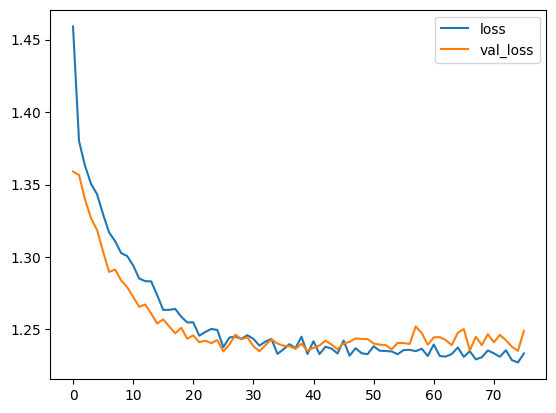

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()

In [22]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape
print(confusion_matrix(y_test_truevalue,x_test_predictions))
print(classification_report(y_test_truevalue,x_test_predictions))

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[394   3 173 187]
 [320   8 263  95]
 [185   9 400  92]
 [225   3  74 480]]
              precision    recall  f1-score   support

           0       0.35      0.52      0.42       757
           1       0.35      0.01      0.02       686
           2       0.44      0.58      0.50       686
           3       0.56      0.61      0.59       782

    accuracy                           0.44      2911
   macro avg       0.42      0.43      0.38      2911
weighted avg       0.43      0.44      0.39      2911

